In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings 
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("C:/Users/tfsam/Desktop/ongoing/dataset_traffic_accident_prediction1.csv")
df = data.copy()
df.head()

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
0,Rainy,City Road,Morning,1.0,100.0,5.0,0.0,NaN,Wet,Car,51.0,48.0,Artificial Light,0.0
1,Clear,Rural Road,Night,NaN,120.0,3.0,0.0,Moderate,Wet,Truck,49.0,43.0,Artificial Light,0.0
2,Rainy,Highway,Evening,1.0,60.0,4.0,0.0,Low,Icy,Car,54.0,52.0,Artificial Light,0.0
3,Clear,City Road,Afternoon,2.0,60.0,3.0,0.0,Low,Under Construction,Bus,34.0,31.0,Daylight,0.0
4,Rainy,Highway,Morning,1.0,195.0,11.0,0.0,Low,Dry,Car,62.0,55.0,Artificial Light,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Weather               798 non-null    object 
 1   Road_Type             798 non-null    object 
 2   Time_of_Day           798 non-null    object 
 3   Traffic_Density       798 non-null    float64
 4   Speed_Limit           798 non-null    float64
 5   Number_of_Vehicles    798 non-null    float64
 6   Driver_Alcohol        798 non-null    float64
 7   Accident_Severity     798 non-null    object 
 8   Road_Condition        798 non-null    object 
 9   Vehicle_Type          798 non-null    object 
 10  Driver_Age            798 non-null    float64
 11  Driver_Experience     798 non-null    float64
 12  Road_Light_Condition  798 non-null    object 
 13  Accident              798 non-null    float64
dtypes: float64(7), object(7)
memory usage: 92.0+ KB


In [7]:
df.isnull().sum()

Weather                 42
Road_Type               42
Time_of_Day             42
Traffic_Density         42
Speed_Limit             42
Number_of_Vehicles      42
Driver_Alcohol          42
Accident_Severity       42
Road_Condition          42
Vehicle_Type            42
Driver_Age              42
Driver_Experience       42
Road_Light_Condition    42
Accident                42
dtype: int64

In [15]:
categorical_columns = ['Weather', 'Road_Type', 'Time_of_Day', 'Accident_Severity', 'Road_Condition', 'Vehicle_Type', 'Road_Light_Condition']

for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [27]:
df['Traffic_Density'].fillna(df['Traffic_Density'].median(), inplace=True)

df['Speed_Limit'] = df.groupby('Road_Type')['Speed_Limit'].transform(lambda x: x.fillna(x.mean()))

df['Number_of_Vehicles'].fillna(df['Number_of_Vehicles'].median(), inplace=True)

df['Driver_Alcohol'].fillna(df['Driver_Alcohol'].mode()[0], inplace=True)

df['Driver_Age'].fillna(df['Driver_Age'].mean(), inplace=True)

df['Accident'].fillna(df['Accident'].mode()[0], inplace=True)

In [33]:
age_bins = [18, 30, 45, 60, 70]
age_labels = ['Young', 'Adult', 'Middle', 'Senior']
df['Driver_Age_Group'] = pd.cut(df['Driver_Age'], bins=age_bins, labels=age_labels)

df['Driver_Age_Group'] = df['Driver_Age_Group'].fillna(df['Driver_Age_Group'].mode()[0])

df['Driver_Experience'] = df.groupby('Driver_Age_Group')['Driver_Experience'].transform(lambda x: x.fillna(x.median()))

In [35]:
df.isnull().sum()

Weather                 0
Road_Type               0
Time_of_Day             0
Traffic_Density         0
Speed_Limit             0
Number_of_Vehicles      0
Driver_Alcohol          0
Accident_Severity       0
Road_Condition          0
Vehicle_Type            0
Driver_Age              0
Driver_Experience       0
Road_Light_Condition    0
Accident                0
Driver_Age_Group        0
dtype: int64

# EDA / Distribution of categorical Variable 

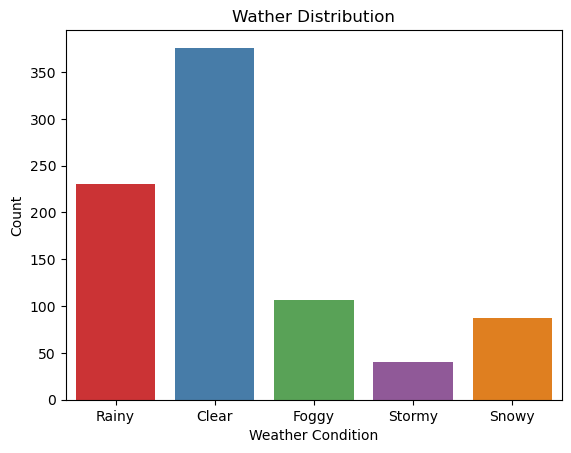

In [38]:
plt.figure(figure=(10, 6))
sns.countplot(data=df, x='Weather', palette='Set1')
plt.title('Wather Distribution')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.show()

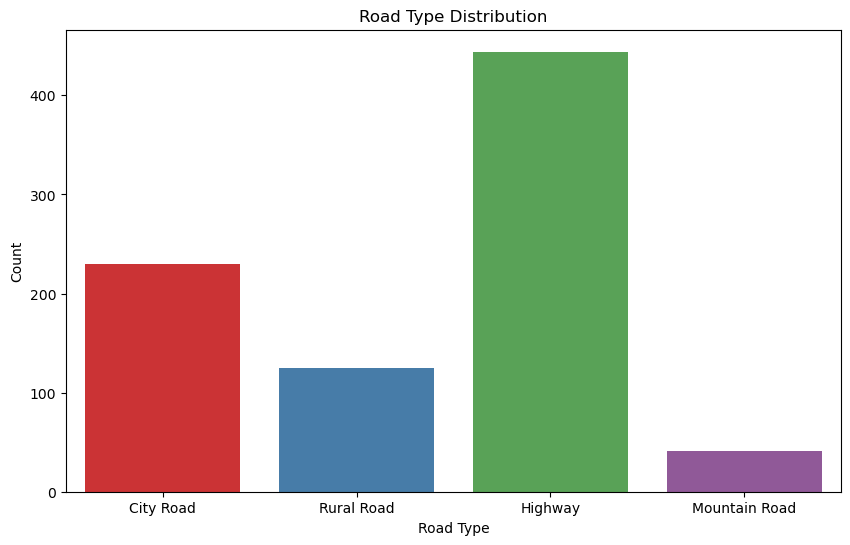

In [40]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Road_Type', palette='Set1')
plt.title('Road Type Distribution')
plt.xlabel('Road Type')
plt.ylabel('Count')
plt.show()

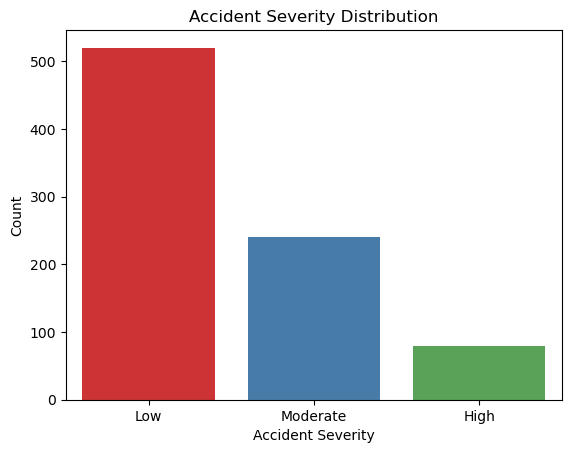

In [42]:
plt.figure(figure=(10, 6))
sns.countplot(data=df, x='Accident_Severity', palette='Set1')
plt.title('Accident Severity Distribution')
plt.xlabel('Accident Severity')
plt.ylabel('Count')
plt.show()

# Distribution of Numerical Variable

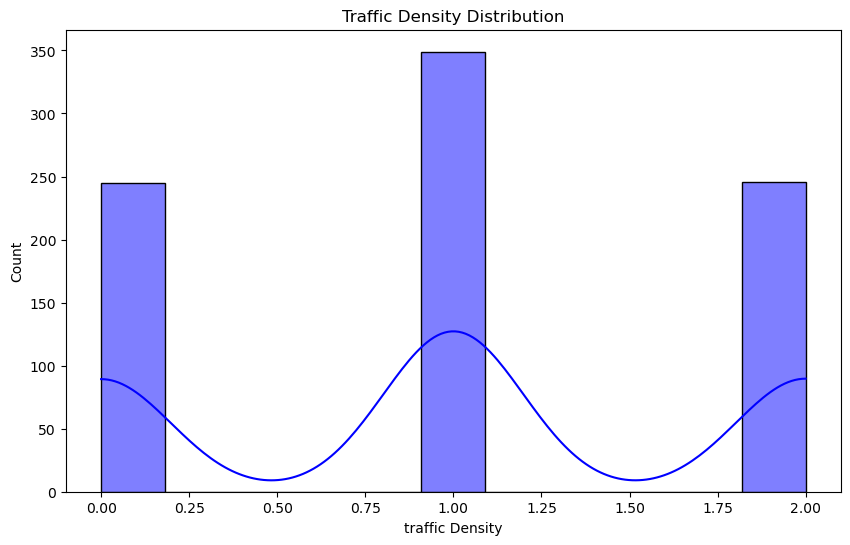

In [49]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Traffic_Density'], kde=True, color='blue')
plt.title('Traffic Density Distribution')
plt.xlabel('traffic Density')
plt.ylabel('Count')
plt.show()

# Drive Age

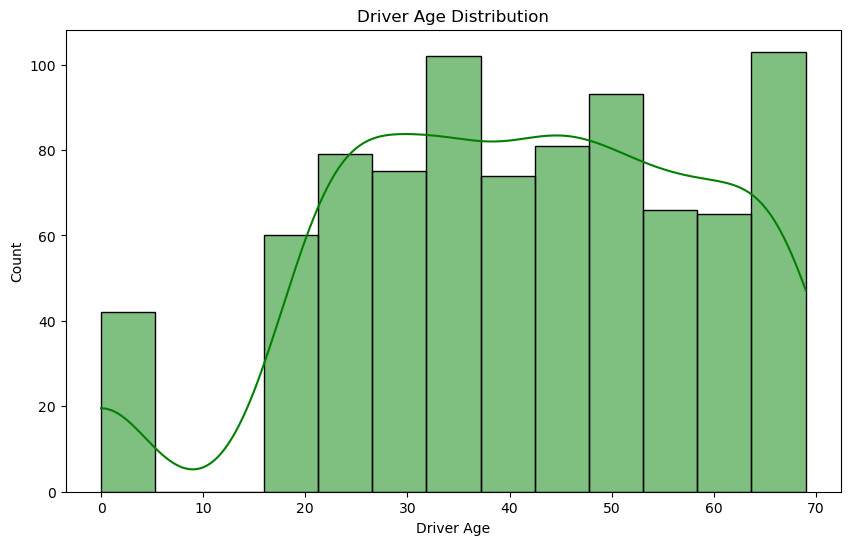

In [56]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Driver_Age'], kde=True, color='green')
plt.title('Driver Age Distribution')
plt.xlabel('Driver Age')
plt.ylabel('Count')
plt.show()

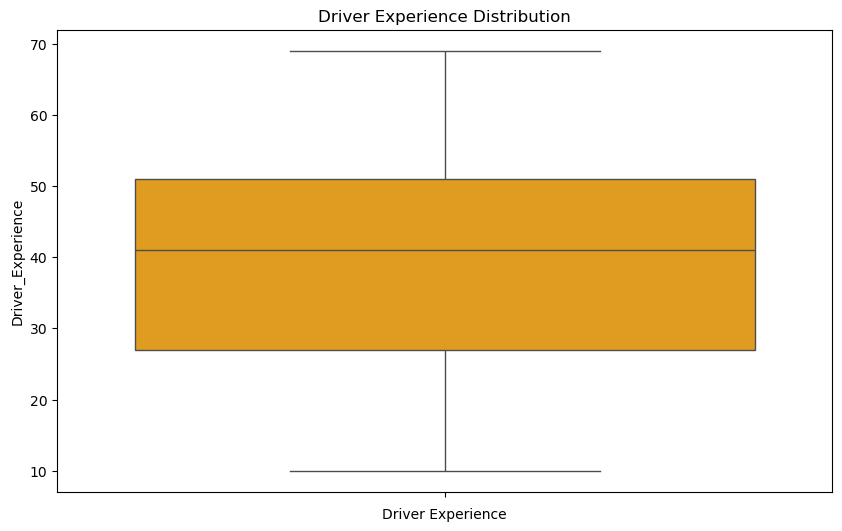

In [58]:
plt.figure(figsize=(10, 6))
sns.boxplot(df['Driver_Experience'], color='orange')
plt.title('Driver Experience Distribution')
plt.xlabel('Driver Experience')
plt.show()

# Relationship Between Two Variables¶
## Correlation Analysis

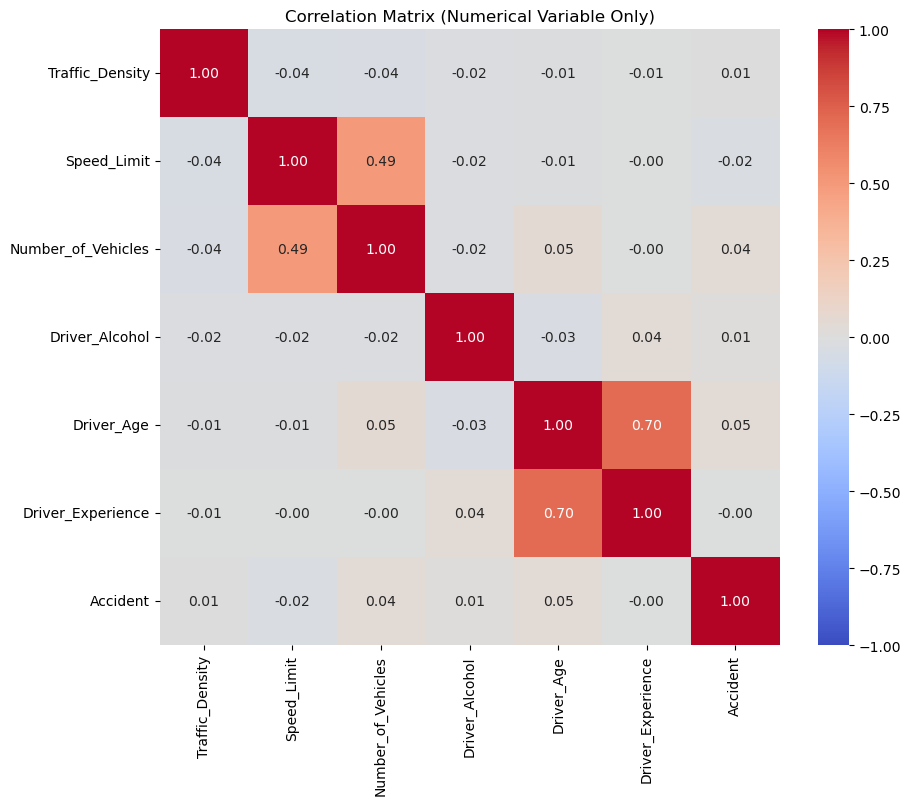

In [61]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix (Numerical Variable Only)')
plt.show()

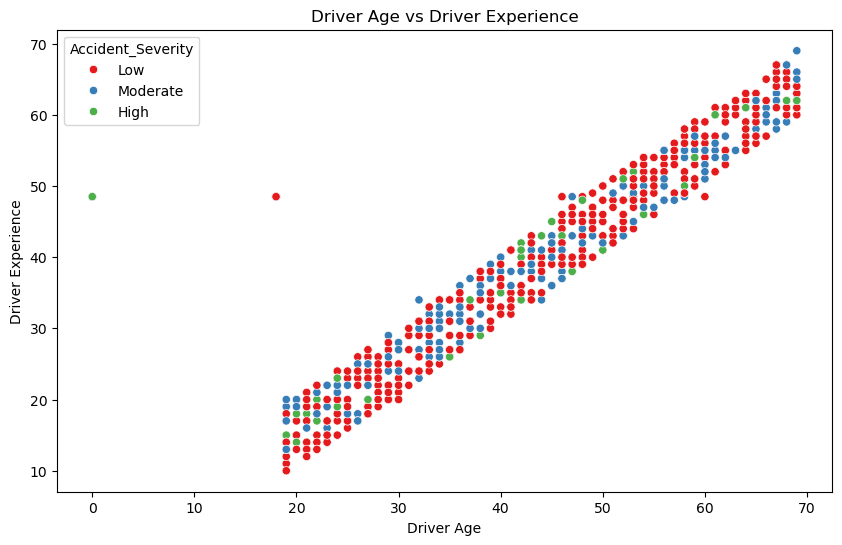

In [63]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Driver_Age', y='Driver_Experience', hue='Accident_Severity', palette='Set1')
plt.title('Driver Age vs Driver Experience')
plt.xlabel('Driver Age')
plt.ylabel('Driver Experience')
plt.show()

## Analysis of Categorical And Numerical Variable

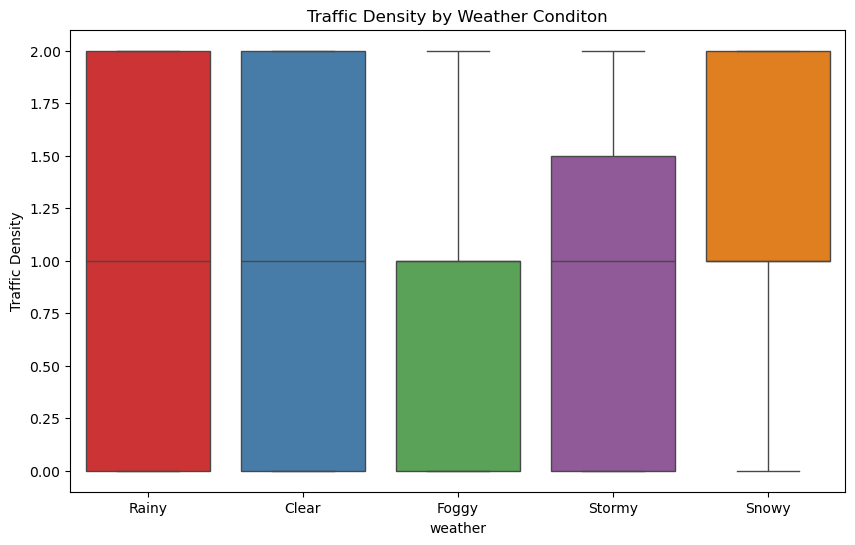

In [66]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Weather', y='Traffic_Density', palette='Set1')
plt.title('Traffic Density by Weather Conditon')
plt.xlabel('weather')
plt.ylabel('Traffic Density')
plt.show()

## Accident Severity an Driver Age

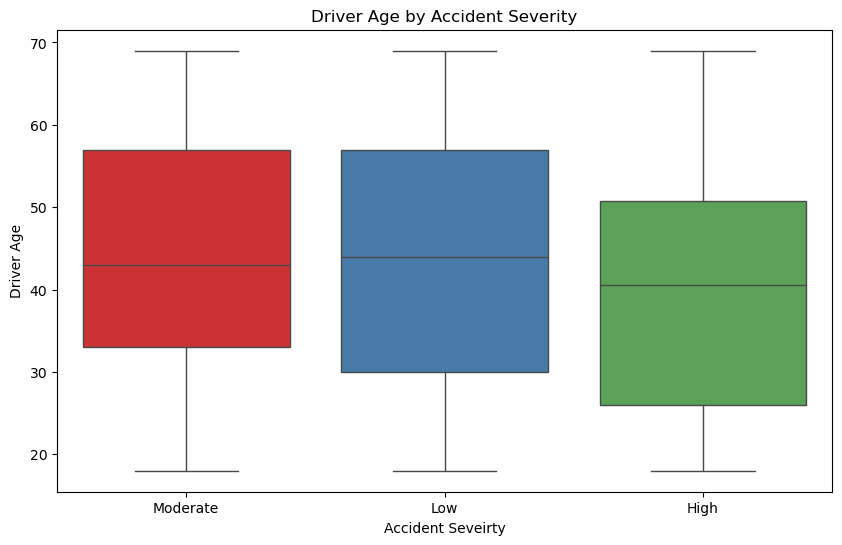

In [71]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Accident_Severity', y='Driver_Age', palette='Set1')
plt.title('Driver Age by Accident Severity')
plt.xlabel('Accident Severity')
plt.ylabel('Driver Age by accident Severity')
plt.xlabel('Accident Seveirty')
plt.ylabel('Driver Age')
plt.show()

## Time of Day and Accident Severity

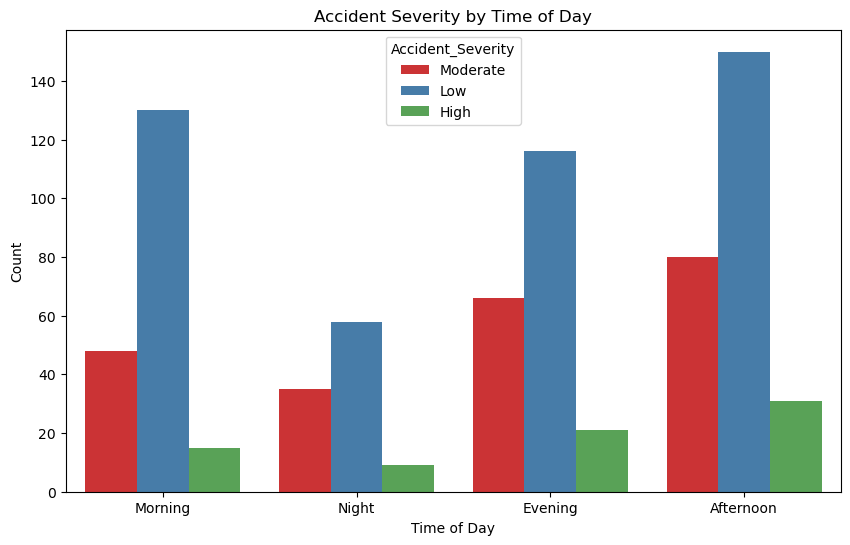

In [78]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Time_of_Day', hue='Accident_Severity', palette='Set1')
plt.title('Accident Severity by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Count')
plt.show()

In [82]:
label_encoders = {}
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

for column in categorical_columns:
    original_values = df[column].unique()

    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

    encoded_values = df[column].unique()
    decoded_values = label_encoders[column].inverse_transform(encoded_values)

    print(f"\n{column} Encoding and Decoding:")
    for enc, dec in zip(encoded_values, decoded_values):
        print(f"{enc} -> {dec}")
    


Road_Type Encoding and Decoding:
0 -> City Road
3 -> Rural Road
1 -> Highway
2 -> Mountain Road

Time_of_Day Encoding and Decoding:
2 -> Morning
3 -> Night
1 -> Evening
0 -> Afternoon

Accident_Severity Encoding and Decoding:
1 -> Low
2 -> Moderate
0 -> High

Road_Condition Encoding and Decoding:
3 -> Wet
1 -> Icy
2 -> Under Construction
0 -> Dry

Vehicle_Type Encoding and Decoding:
1 -> Car
3 -> Truck
0 -> Bus
2 -> Motorcycle

Road_Light_Condition Encoding and Decoding:
0 -> Artificial Light
1 -> Daylight
2 -> No Light

Driver_Age_Group Encoding and Decoding:
1 -> Middle
0 -> Adult
2 -> Senior
3 -> Young


In [92]:
X = df.drop(columns=['Accident', 'Accident_Severity'])
y = df['Accident']

In [96]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=42)

In [100]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)
print("Random Frest Accuracy: ", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Frest Accuracy:  0.7142857142857143
[[115   2]
 [ 46   5]]
              precision    recall  f1-score   support

         0.0       0.71      0.98      0.83       117
         1.0       0.71      0.10      0.17        51

    accuracy                           0.71       168
   macro avg       0.71      0.54      0.50       168
weighted avg       0.71      0.71      0.63       168



In [108]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

print("Random FOrest accuracy: ", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random FOrest accuracy:  0.7142857142857143
[[115   2]
 [ 46   5]]
              precision    recall  f1-score   support

         0.0       0.71      0.98      0.83       117
         1.0       0.71      0.10      0.17        51

    accuracy                           0.71       168
   macro avg       0.71      0.54      0.50       168
weighted avg       0.71      0.71      0.63       168



In [110]:
model_cat = CatBoostClassifier(iterations=500, learning_rate=0.1, depth=6, class_weights=[1, len(y_train[y_train == 0]) / len(y_train[y_train == 1])], verbose=0)
model_cat.fit(X_train, y_train)
y_pred_cat = model_cat.predict(X_test)
print("CatBoost Accuracy:", accuracy_score(y_test, y_pred_cat))
print(classification_report(y_test, y_pred_cat))

CatBoost Accuracy: 0.6785714285714286
              precision    recall  f1-score   support

         0.0       0.73      0.85      0.79       117
         1.0       0.45      0.27      0.34        51

    accuracy                           0.68       168
   macro avg       0.59      0.56      0.56       168
weighted avg       0.65      0.68      0.65       168

